In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-tv-series-data/documentary_series.csv
/kaggle/input/imdb-tv-series-data/western_series.csv
/kaggle/input/imdb-tv-series-data/family_series.csv
/kaggle/input/imdb-tv-series-data/crime_series.csv
/kaggle/input/imdb-tv-series-data/mystery_series.csv
/kaggle/input/imdb-tv-series-data/music_series.csv
/kaggle/input/imdb-tv-series-data/horror_series.csv
/kaggle/input/imdb-tv-series-data/war_series.csv
/kaggle/input/imdb-tv-series-data/sport_series.csv
/kaggle/input/imdb-tv-series-data/action_series.csv
/kaggle/input/imdb-tv-series-data/thriller_series.csv
/kaggle/input/imdb-tv-series-data/history_series.csv
/kaggle/input/imdb-tv-series-data/adventure_series.csv
/kaggle/input/imdb-tv-series-data/drama_series.csv
/kaggle/input/imdb-tv-series-data/superhero_series.csv
/kaggle/input/imdb-tv-series-data/sci-fi_series.csv
/kaggle/input/imdb-tv-series-data/biography_series.csv
/kaggle/input/imdb-tv-series-data/musical_series.csv
/kaggle/input/imdb-tv-series-data/animation_series.

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# **IMDB TV Dizilerinin Rating Tahmini**

**ADIM 1: Veri Setini Yükleme**

In [53]:
df = pd.read_csv('/kaggle/input/imdb-tv-series-data/comedy_series.csv')

**ADIM 2: Veri Setini İnceleme**

In [54]:
#ilk 5 satırı gösterme
df.head(5)

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue
0,Succession,tt7660850,2018–2023,"Comedy, Drama","Stars:, Sarah Snook, , Nicholas Braun, , Brian...",The Roy family is known for controlling the bi...,8.9,60 min,TV-MA,203682,NaN
1,Ted Lasso,tt10986410,2020–2023,"Comedy, Drama, Sport","Stars:, Jason Sudeikis, , Brett Goldstein, , B...",American college football coach Ted Lasso head...,8.8,30 min,TV-MA,274806,NaN
2,Barry,tt5348176,2018–2023,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,NaN
3,Guardians of the Galaxy Vol. 3,tt6791350,2023,"Action, Adventure, Comedy","Director:, James Gunn, | , Stars:, Chris P...","Still reeling from the loss of Gamora, Peter Q...",8.2,150 min,PG-13,160447,NaN
4,Dungeons & Dragons: Honor Among Thieves,tt2906216,2023,"Action, Adventure, Comedy","Directors:, John Francis Daley, , Jonathan Gol...",A charming thief and a band of unlikely advent...,7.3,134 min,PG-13,123247,NaN


In [55]:
#satır sütun sayısı
df.shape

(11777, 11)

In [56]:
#sütun adları
df.columns

Index(['Title', 'IMDb ID', 'Release Year', 'Genre', 'Cast', 'Synopsis',
       'Rating', 'Runtime', 'Certificate', 'Number of Votes', 'Gross Revenue'],
      dtype='object')

In [57]:
#sütunlar ile ilgili bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11777 entries, 0 to 11776
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            11777 non-null  object 
 1   IMDb ID          11777 non-null  object 
 2   Release Year     11777 non-null  object 
 3   Genre            11777 non-null  object 
 4   Cast             11775 non-null  object 
 5   Synopsis         11777 non-null  object 
 6   Rating           11777 non-null  float64
 7   Runtime          11379 non-null  object 
 8   Certificate      10425 non-null  object 
 9   Number of Votes  11777 non-null  int64  
 10  Gross Revenue    3785 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1012.2+ KB


In [58]:
#istatiksel özet
df.describe()

,Rating,Number of Votes
count,11777.000000,1.177700e+04
mean,6.672693,6.324647e+04
std,1.263842,1.525381e+05
min,1.100000,5.000000e+00
25%,5.900000,2.796000e+03
50%,6.700000,1.000900e+04
75%,7.600000,4.508500e+04
max,9.700000,1.465095e+06


**2.1 Eksik Verileri Ele Alma**

In [59]:
#eksik verileri kontrol etme
df.isna().sum()

Title                 0
IMDb ID               0
Release Year          0
Genre                 0
Cast                  2
Synopsis              0
Rating                0
Runtime             398
Certificate        1352
Number of Votes       0
Gross Revenue      7992
dtype: int64

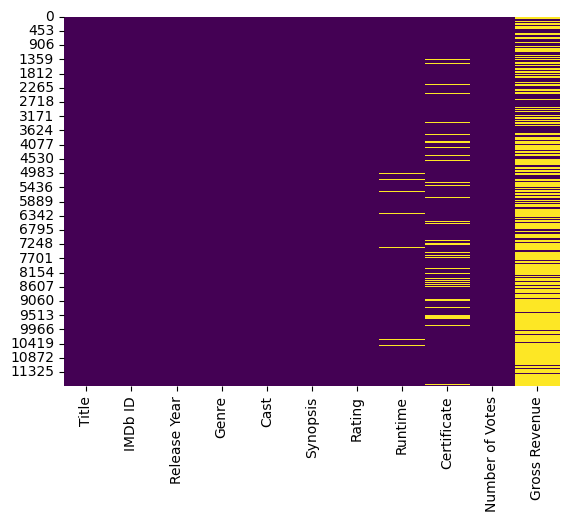

In [60]:
# Eksik verilerin ısı haritasını görüntüleme
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [61]:
# 'cast' sütunundki eksik veri sayısı az olduğundan(2) silinebilir.
df.dropna(subset=['Cast'], inplace=True)

In [62]:
# "Runtime" sütunundaki virgülleri kaldırma
df['Runtime'] = df['Runtime'].str.replace(',', '')
# "Runtime" sütunundaki değerleri çıkartma ve float'a dönüştürme
df['Runtime_minutes'] = df['Runtime'].str.extract('(\d+)').astype(float)
# "Runtime_minutes" sütunundaki eksik değerleri ortalama ile doldurma
mean_runtime = df['Runtime_minutes'].mean()
df['Runtime_minutes'].fillna(mean_runtime, inplace=True)

In [63]:
# "Certificate" sütunundaki eksik değerleri "Unspecified" ile doldurma
df['Certificate'].fillna('Unspecified', inplace=True)
# "Gross Revenue" sütunundaki eksik değerleri "Unspecified" ile doldurma
df['Gross Revenue'].fillna('Unspecified', inplace=True)

In [64]:
#eksik verileri kontrol etme
df.isna().sum()

Title                0
IMDb ID              0
Release Year         0
Genre                0
Cast                 0
Synopsis             0
Rating               0
Runtime            397
Certificate          0
Number of Votes      0
Gross Revenue        0
Runtime_minutes      0
dtype: int64

In [65]:
#değişişklikler sonrası sütunlarla ilgili güncel bilgiler:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11775 entries, 0 to 11776
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            11775 non-null  object 
 1   IMDb ID          11775 non-null  object 
 2   Release Year     11775 non-null  object 
 3   Genre            11775 non-null  object 
 4   Cast             11775 non-null  object 
 5   Synopsis         11775 non-null  object 
 6   Rating           11775 non-null  float64
 7   Runtime          11378 non-null  object 
 8   Certificate      11775 non-null  object 
 9   Number of Votes  11775 non-null  int64  
 10  Gross Revenue    11775 non-null  object 
 11  Runtime_minutes  11775 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.2+ MB


**ADIM 3: Veri Keşfi ve Görselleştime**

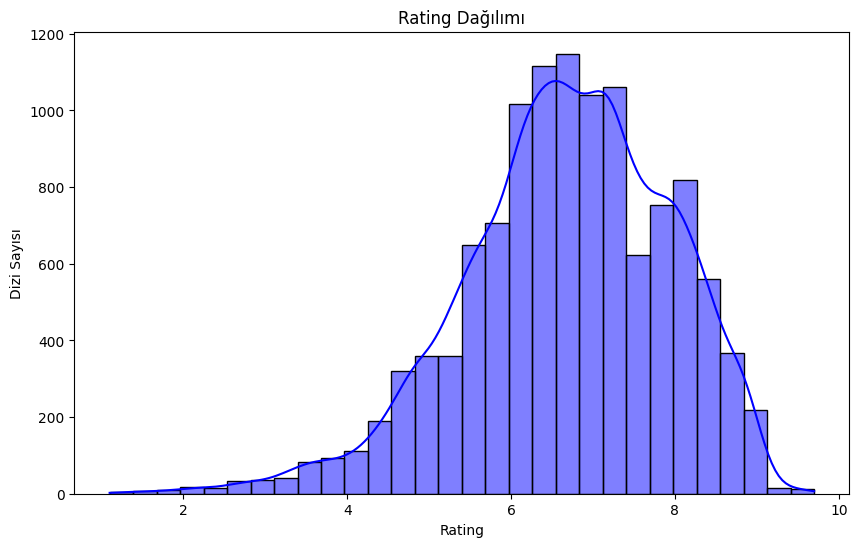

In [66]:
#rating dağılım grafiği
ratings = df['Rating']

plt.figure(figsize=(10, 6))  # Grafiğin boyutunu ayarlayabilirsiniz
sns.histplot(ratings, bins=30, kde=True, color='blue')  # Rating histogramını çizme
plt.title('Rating Dağılımı')
plt.xlabel('Rating')
plt.ylabel('Dizi Sayısı')
plt.show()

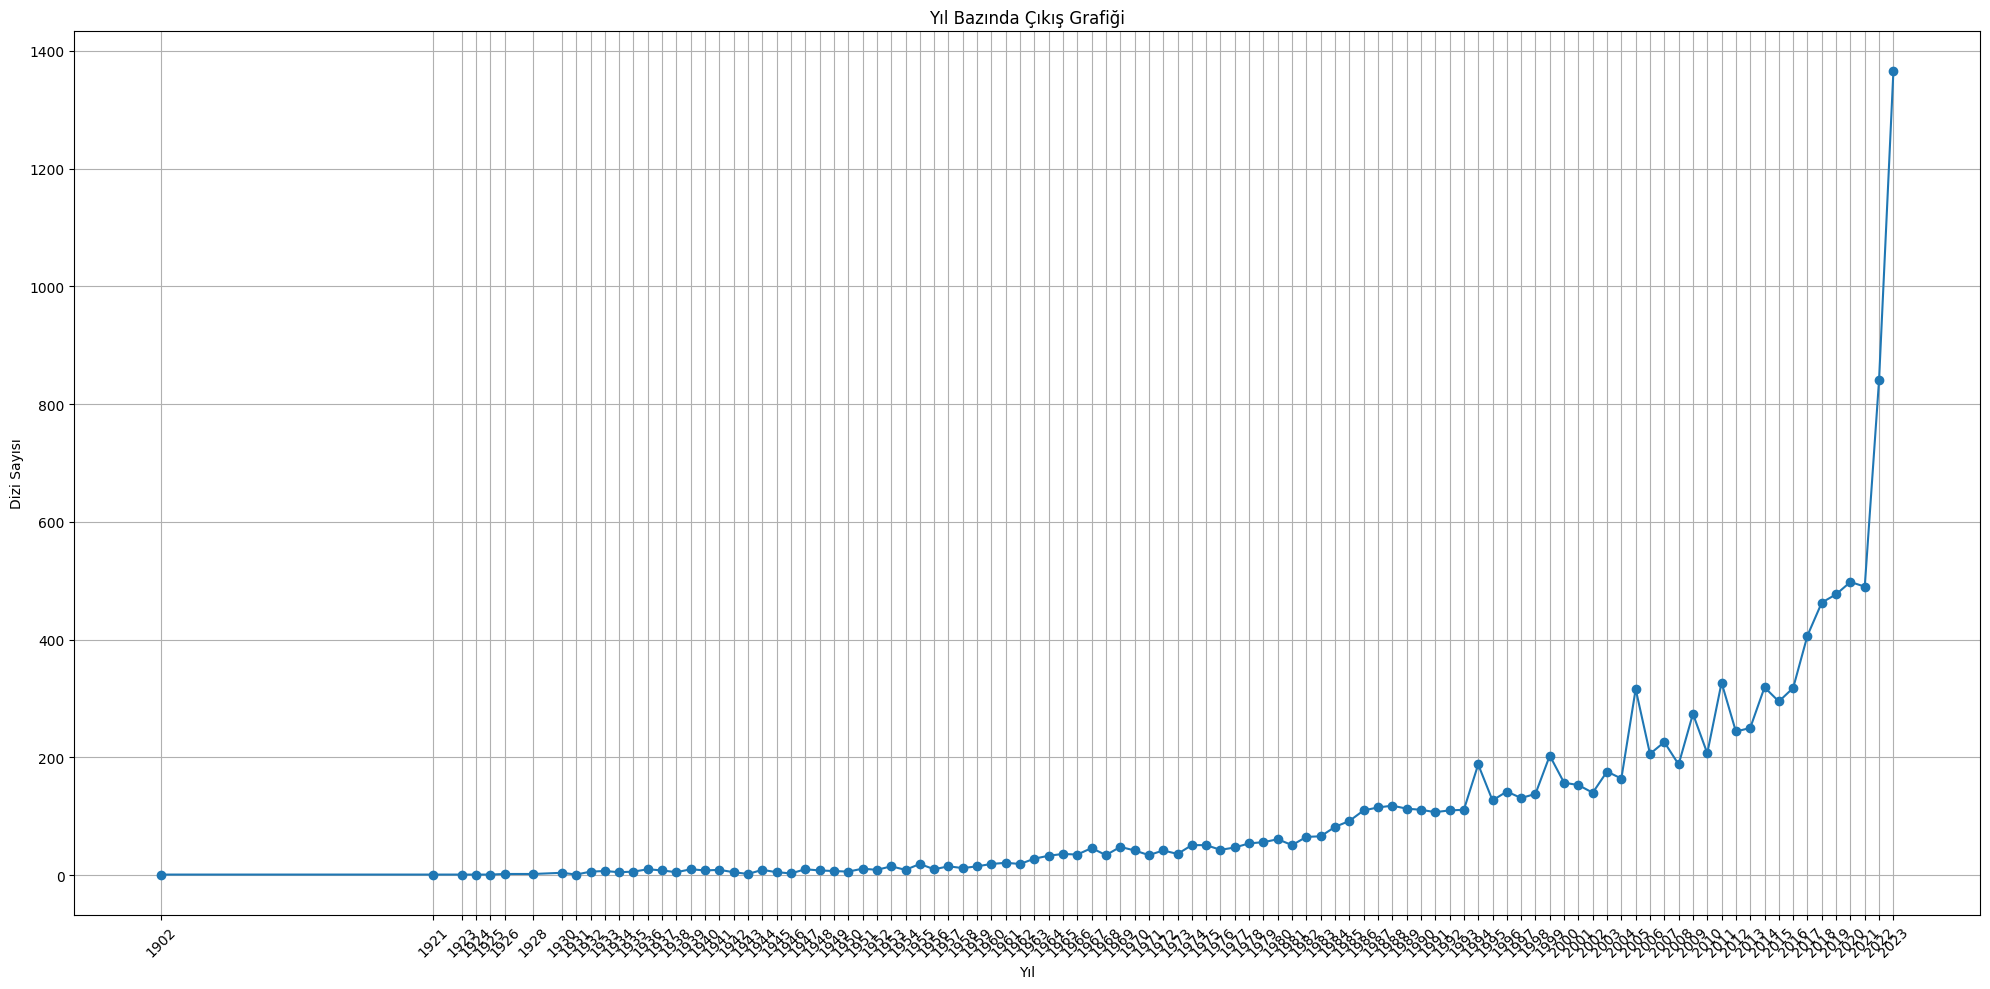

In [67]:
# Geçerli yıl değerlerini içeren satırları seçme
valid_years = df['Release Year'].str.extract(r'(\d{4})', expand=False)  # Dört basamaklı yılları yakalama
valid_years = valid_years.dropna()  # NaN değerleri kaldırma

# Seçilen geçerli yılları tamsayıya dönüştürme
years = valid_years.astype(int)

# Yıl bazında çıkış grafiğini çizme
year_counts = years.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')
plt.title('Yıl Bazında Çıkış Grafiği')
plt.xlabel('Yıl')
plt.ylabel('Dizi Sayısı')
plt.grid(True)
plt.xticks(year_counts.index, rotation=45)
plt.tight_layout()

plt.show()

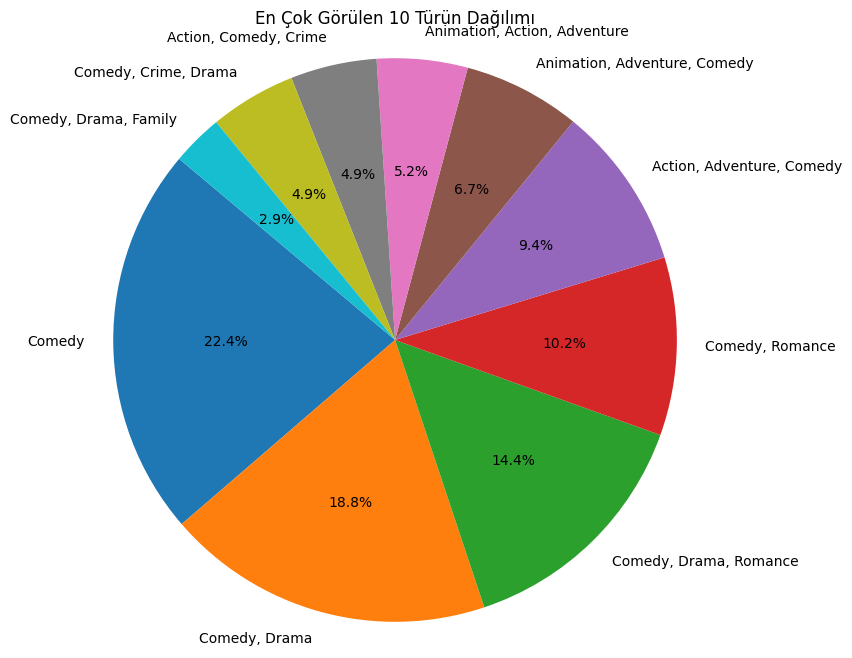

In [68]:
#tür dağılımı grafiği
genre_counts = df['Genre'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('En Çok Görülen 10 Türün Dağılımı')
plt.axis('equal')  # Pasta grafiğini dairenin içine yerleştirir
plt.show()

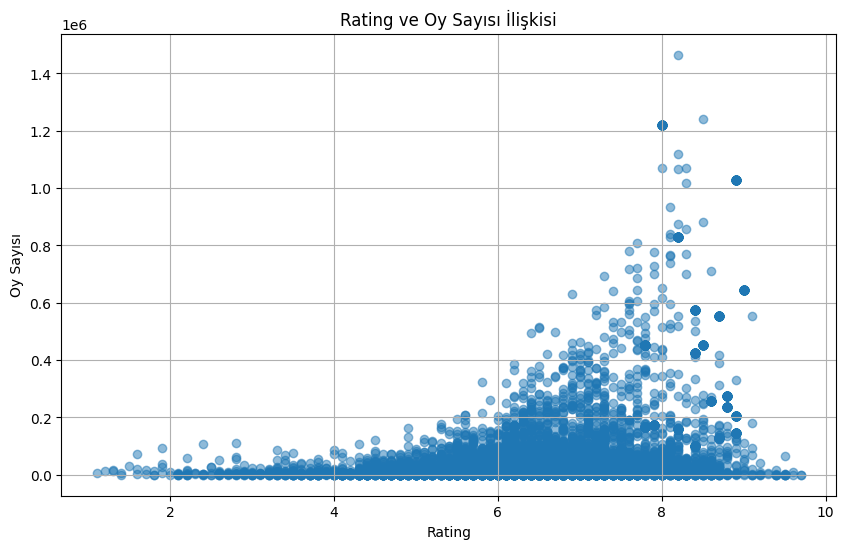

In [69]:
#rating ve oy sayısı ilişkisi grafiği
rating = df['Rating']
votes = df['Number of Votes']

plt.figure(figsize=(10, 6))
plt.scatter(rating, votes, alpha=0.5)  # Alpha, noktaların saydamlığını ayarlar
plt.title('Rating ve Oy Sayısı İlişkisi')
plt.xlabel('Rating')
plt.ylabel('Oy Sayısı')
plt.grid(True)
plt.show()

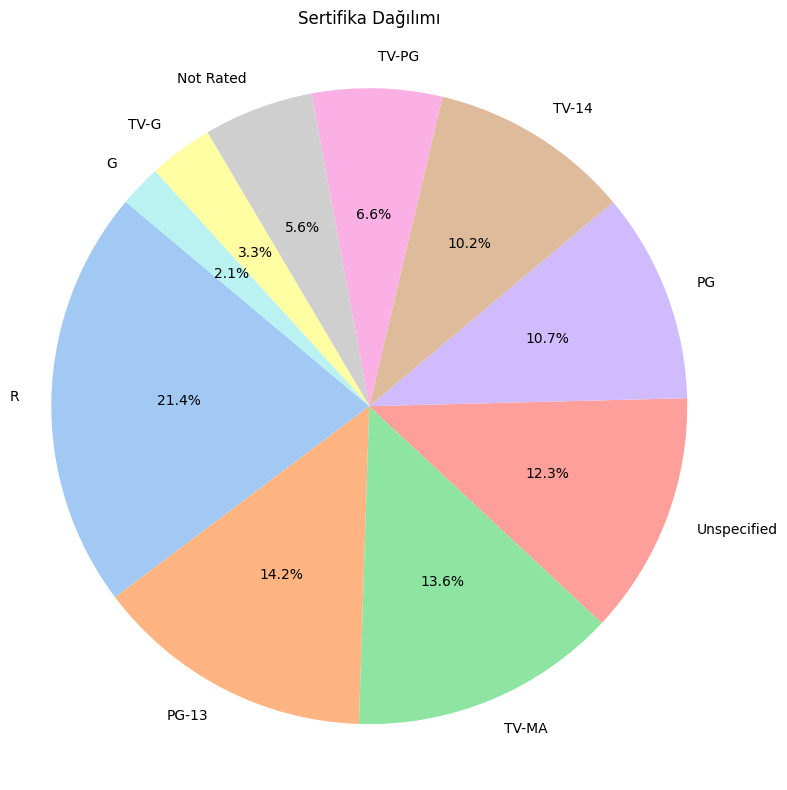

In [70]:
#sertifika dağılımı grafiği
certificate_counts = df['Certificate'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(certificate_counts, labels=certificate_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sertifika Dağılımı')
plt.axis('equal')  # Eşit boyutlu pasta dilimi grafiği yapmak için
plt.tight_layout()
plt.show()

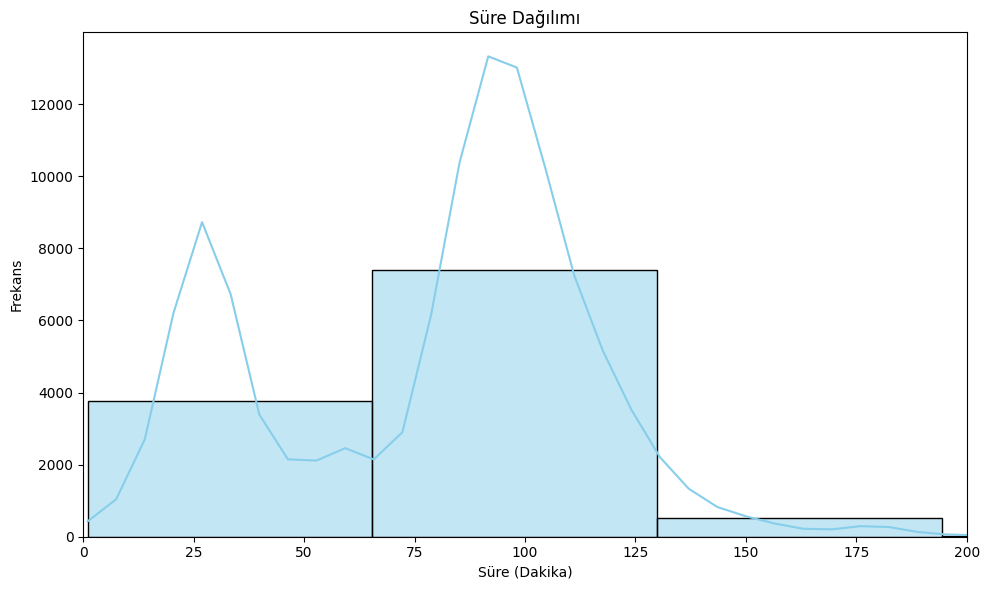

In [71]:
# Süre (dakika cinsinden) dağılım grafiği
runtime_values = df['Runtime_minutes']

plt.figure(figsize=(10, 6))
sns.histplot(runtime_values, bins=20, kde=True, color='skyblue')
plt.title('Süre Dağılımı')
plt.xlabel('Süre (Dakika)')
plt.ylabel('Frekans')
plt.xlim(0, 200)  # X ekseni sınırlarını belirleyin
plt.tight_layout()
plt.show()

**ADIM 4: Başlangıç ve Orta Seviye Sorular**

**4.1 Başlangıç Seviye Sorular**

In [72]:
df.head(5)

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue,Runtime_minutes
0,Succession,tt7660850,2018–2023,"Comedy, Drama","Stars:, Sarah Snook, , Nicholas Braun, , Brian...",The Roy family is known for controlling the bi...,8.9,60 min,TV-MA,203682,Unspecified,60.0
1,Ted Lasso,tt10986410,2020–2023,"Comedy, Drama, Sport","Stars:, Jason Sudeikis, , Brett Goldstein, , B...",American college football coach Ted Lasso head...,8.8,30 min,TV-MA,274806,Unspecified,30.0
2,Barry,tt5348176,2018–2023,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,Unspecified,30.0
3,Guardians of the Galaxy Vol. 3,tt6791350,2023,"Action, Adventure, Comedy","Director:, James Gunn, | , Stars:, Chris P...","Still reeling from the loss of Gamora, Peter Q...",8.2,150 min,PG-13,160447,Unspecified,150.0
4,Dungeons & Dragons: Honor Among Thieves,tt2906216,2023,"Action, Adventure, Comedy","Directors:, John Francis Daley, , Jonathan Gol...",A charming thief and a band of unlikely advent...,7.3,134 min,PG-13,123247,Unspecified,134.0


In [73]:
#1.Dizilerin türleri nelerdir ve her türde kaç dizi bulunmaktadır?
genres = df['Genre'].str.split(', ')
all_genres = []
for genre_list in genres:
    all_genres.extend(genre_list)
genre_counts = pd.Series(all_genres).value_counts()
print(genre_counts)

Comedy         11295
Drama           4273
Romance         2186
Adventure       2113
Action          1953
Animation       1356
Crime           1154
Family           884
Fantasy          696
Horror           598
Music            319
Sci-Fi           258
Sport            253
Short            224
Biography        215
Mystery          189
Musical          183
Thriller         146
War               56
Documentary       55
History           49
Western           45
Talk-Show         36
Reality-TV        33
Game-Show         30
News               6
Film-Noir          2
Name: count, dtype: int64


In [74]:
#2.Dizilerin IMDb puanlarının dağılımı nasıldır? Hangi puan aralıkları daha yaygındır?
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
min_rating = df['Rating'].min()
max_rating = df['Rating'].max()
rating_stddev = df['Rating'].std()

print(f"Ortalama IMDb Puanı: {mean_rating:.2f}")
print(f"Medyan IMDb Puanı: {median_rating:.2f}")
print(f"En Düşük IMDb Puanı: {min_rating:.2f}")
print(f"En Yüksek IMDb Puanı: {max_rating:.2f}")
print(f"IMDb Puanlarının Standart Sapması: {rating_stddev:.2f}")

Ortalama IMDb Puanı: 6.67
Medyan IMDb Puanı: 6.70
En Düşük IMDb Puanı: 1.10
En Yüksek IMDb Puanı: 9.70
IMDb Puanlarının Standart Sapması: 1.26


In [75]:
#3. En düşük ve en yüksek IMDb puanına sahip diziler
min_rating_series = df[df['Rating'] == df['Rating'].min()]
print("En Düşük IMDb Puanına Sahip Dizi:")
for index, row in min_rating_series.iterrows():
    print(f"{row['Title']} - IMDb Puanı: {row['Rating']}")
    
max_rating_series = df[df['Rating'] == df['Rating'].max()]
print("\nEn Yüksek IMDb Puanına Sahip Dizi:")
for index, row in max_rating_series.iterrows():
    print(f"{row['Title']} - IMDb Puanı: {row['Rating']}")

En Düşük IMDb Puanına Sahip Dizi:
The Gringo Papi - IMDb Puanı: 1.1

En Yüksek IMDb Puanına Sahip Dizi:
Generation Loss: The Social Experiments - IMDb Puanı: 9.7
The Why Files - IMDb Puanı: 9.7


In [76]:
#4.Hangi yıllarda daha fazla dizi çıkmıştır? 
df['Release Year'] = df['Release Year'].str.extract('(\d+)').astype(float)
year_counts = df['Release Year'].value_counts().sort_values(ascending=False)
top_10_years = year_counts.head(10)
print(top_10_years)

Release Year
2023.0    1365
2022.0     841
2020.0     498
2021.0     490
2019.0     477
2018.0     463
2017.0     407
2011.0     327
2014.0     319
2016.0     318
Name: count, dtype: int64


In [77]:
#5.Dizilerin sürelerinin (runtime) dağılımı nasıldır? Hangi süre aralığı daha yaygındır?
runtime_summary = df['Runtime'].describe()
runtime_mode = df['Runtime'].mode().values[0]

print("Süre Dağılımı İstatistikleri:")
print(runtime_summary)
print("\nEn Sık Görülen Süre Aralığı (Mod):", runtime_mode)


Süre Dağılımı İstatistikleri:
count      11378
unique       234
top       30 min
freq        1269
Name: Runtime, dtype: object

En Sık Görülen Süre Aralığı (Mod): 30 min


In [78]:
#6.Dizilerin sertifika dağılımı nasıldır? Hangi sertifikasyonlar daha yaygındır?
certificate_counts = df['Certificate'].value_counts()
certificate_distribution = certificate_counts.reset_index()
certificate_distribution.columns = ['Sertifika', 'Sayı']
top_certificates = certificate_distribution.head(10)

print("Sertifika Dağılımı:")
print(top_certificates)


Sertifika Dağılımı:
     Sertifika  Sayı
0            R  2339
1        PG-13  1557
2        TV-MA  1486
3  Unspecified  1351
4           PG  1170
5        TV-14  1118
6        TV-PG   723
7    Not Rated   612
8         TV-G   357
9            G   233


In [79]:
#7. Dizilerin oy dağılımı nasıldır ?
# "Oy" sütununu seçin ve NaN değerleri temizleyin
ratings = df['Number of Votes'].dropna()
mean_rating = ratings.mean()
median_rating = ratings.median()
std_deviation = ratings.std()
quartiles = ratings.quantile([0.25, 0.5, 0.75])

print(f"Ortalama Oy: {mean_rating}")
print(f"Medyan Oy: {median_rating}")
print(f"Standart Sapma: {std_deviation}")
print(f"Çeyrekler (25%, 50%, 75%):")
print(quartiles)


Ortalama Oy: 63255.75685774947
Medyan Oy: 10009.0
Standart Sapma: 152549.35898414705
Çeyrekler (25%, 50%, 75%):
0.25     2797.5
0.50    10009.0
0.75    45085.0
Name: Number of Votes, dtype: float64


In [80]:
#8.Hangi diziler en fazla oy almıştır?
most_voted_series = df[df['Number of Votes'] == df['Number of Votes'].max()]

print("En Fazla Oy Alan Diziler:")
for index, row in most_voted_series.iterrows():
    print(f"{row['Title']} - {row['Number of Votes']} oy")

En Fazla Oy Alan Diziler:
The Wolf of Wall Street - 1465095 oy


In [81]:
#9.Dizilerin özetlerinde en çok geçen kelimeler nelerdir? 
import nltk
nltk.download('stopwords')

from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# NLTK'den "stop words" listesini alın
stop_words = set(stopwords.words('english'))

# Özetleri küçük harfe çevirin ve özel karakterleri kaldırın
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Tüm özetleri birleştirin (veri çerçevesindeki özetlerle aynı işlemi yaparsınız)
all_summaries = " ".join(df['Synopsis'].dropna())

# Metni kelimelere bölün
words = all_summaries.split()

# "stop words" listesinde olmayan ve 2 harf veya daha uzun olan kelimeleri sayın
filtered_words = [word for word in words if word not in stop_words and len(word) >= 2]

# Kelime sıklıklarını sayın
word_counts = Counter(filtered_words)

# En çok geçen 10 kelimeyi bulun
most_common_words = word_counts.most_common(10)

# Sonuçları yazdırın
print("En Çok Geçen 10 Kelime:")
for word, count in most_common_words:
    print(f"{word}: {count} kez")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
En Çok Geçen 10 Kelime:
The: 1563 kez
young: 860 kez
life: 838 kez
new: 714 kez
family: 688 kez
When: 641 kez
friends: 632 kez
one: 628 kez
two: 606 kez
must: 595 kez


In [82]:
#10.Dizilerin oyuncu kadroları içerisinde en çok hangi oyuncular yer almıştır?

# 'Cast' sütunundaki eksik değerleri boş dize ile doldur
df['Cast'].fillna('', inplace=True)

# Yıldızları 'Stars' sütununa ekler
df['Stars'] = df['Cast'].apply(lambda x: [item.strip() for item in x.split(',') if item.strip() and not item.strip().startswith("director")])

# Yönetmenleri 'Directors' sütununa ekler
df['Directors'] = df['Cast'].apply(lambda x: [item.strip() for item in x.split(',') if item.strip().startswith("director")])

In [83]:
def parse_cast(cast_str):
    items = cast_str.split(',')
    stars = []
    directors = []
    current_list = None

    for item in items:
        item = item.strip()
        if item.startswith('Stars:') or item.startswith('Star:'):
            current_list = stars
        elif item.startswith('Directors:') or item.startswith('Director:'):
            current_list = directors
        elif current_list is not None:
            current_list.append(item)

    return stars, directors

In [84]:
df['Stars'], df['Directors'] = zip(*df['Cast'].apply(parse_cast))

In [85]:
df.head(10)

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue,Runtime_minutes,Stars,Directors
0,Succession,tt7660850,2018.0,"Comedy, Drama","Stars:, Sarah Snook, , Nicholas Braun, , Brian...",The Roy family is known for controlling the bi...,8.9,60 min,TV-MA,203682,Unspecified,60.0,"[Sarah Snook, , Nicholas Braun, , Brian Cox, ,...",[]
1,Ted Lasso,tt10986410,2020.0,"Comedy, Drama, Sport","Stars:, Jason Sudeikis, , Brett Goldstein, , B...",American college football coach Ted Lasso head...,8.8,30 min,TV-MA,274806,Unspecified,30.0,"[Jason Sudeikis, , Brett Goldstein, , Brendan ...",[]
2,Barry,tt5348176,2018.0,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,Unspecified,30.0,"[Bill Hader, , Stephen Root, , Sarah Goldberg,...",[]
3,Guardians of the Galaxy Vol. 3,tt6791350,2023.0,"Action, Adventure, Comedy","Director:, James Gunn, | , Stars:, Chris P...","Still reeling from the loss of Gamora, Peter Q...",8.2,150 min,PG-13,160447,Unspecified,150.0,"[Chris Pratt, , Chukwudi Iwuji, , Bradley Coop...","[James Gunn, |]"
4,Dungeons & Dragons: Honor Among Thieves,tt2906216,2023.0,"Action, Adventure, Comedy","Directors:, John Francis Daley, , Jonathan Gol...",A charming thief and a band of unlikely advent...,7.3,134 min,PG-13,123247,Unspecified,134.0,"[Chris Pine, , Michelle Rodriguez, , Regé-Jean...","[John Francis Daley, , Jonathan Goldstein, |]"
5,The Super Mario Bros. Movie,tt6718170,2023.0,"Animation, Adventure, Comedy","Directors:, Aaron Horvath, , Michael Jelenic, ...",A plumber named Mario travels through an under...,7.2,92 min,PG,134835,Unspecified,92.0,"[Chris Pratt, , Anya Taylor-Joy, , Charlie Day...","[Aaron Horvath, , Michael Jelenic, , Pierre Le..."
6,The Marvelous Mrs. Maisel,tt5788792,2017.0,"Comedy, Drama","Stars:, Rachel Brosnahan, , Alex Borstein, , M...","After her husband leaves her, young mother of ...",8.7,57 min,TV-MA,128557,Unspecified,57.0,"[Rachel Brosnahan, , Alex Borstein, , Michael ...",[]
7,The Machine,tt11040844,2023.0,"Action, Comedy","Director:, Peter Atencio, | , Stars:, Bert...",Bert's drunken past catches up with him 20 yea...,6.6,112 min,R,3193,Unspecified,112.0,"[Bert Kreischer, , Mark Hamill, , Jimmy Tatro,...","[Peter Atencio, |]"
8,Spider-Man: Into the Spider-Verse,tt4633694,2018.0,"Animation, Action, Adventure","Directors:, Bob Persichetti, , Peter Ramsey, ,...",Teen Miles Morales becomes the Spider-Man of h...,8.4,117 min,PG,575321,"190,241,310",117.0,"[Shameik Moore, , Jake Johnson, , Hailee Stein...","[Bob Persichetti, , Peter Ramsey, , Rodney Rot..."
9,Shazam! Fury of the Gods,tt10151854,2023.0,"Action, Adventure, Comedy","Director:, David F. Sandberg, | , Stars:, ...",The film continues the story of teenage Billy ...,6.0,130 min,PG-13,82520,Unspecified,130.0,"[Zachary Levi, , Asher Angel, , Jack Dylan Gra...","[David F. Sandberg, |]"


In [86]:
#Dizilerin oyuncu kadroları içerisinde en çok hangi oyuncular yer almıştır?
from collections import Counter

# Tüm oyuncu kadrolarını birleştirin
all_casts = [cast for casts in df['Stars'] for cast in casts]

# Oyuncu kadrolarındaki oyuncu sayılarını sayın
cast_counts = Counter(all_casts)

# En çok yer alan oyuncuları ve sayılarını bulun (ilk 10 oyuncuyu alın)
most_common_casts = [(cast, count) for cast, count in cast_counts.items() if cast.strip() and cast != ':' and len(cast) > 2]

# Sayıya göre sıralayın
most_common_casts.sort(key=lambda x: x[1], reverse=True)

# Sonuçları yazdırın (ilk 10 oyuncuyu yazdırın)
for cast, count in most_common_casts[:10]:
    print(f"{cast}: {count} dizi")

Chris Pratt: 148 dizi
Charlie Day: 145 dizi
Tom Hanks: 126 dizi
Bradley Cooper: 104 dizi
Simon Helberg: 97 dizi
Glenn Howerton: 95 dizi
Steve Carell: 80 dizi
Jennifer Aniston: 80 dizi
Paul Rudd: 79 dizi
Jack Black: 76 dizi


In [87]:
#11.Dizilerin yönetmenleri arasında hangi yönetmen en fazla dizi yönetmiştir?
from collections import Counter
all_directors = [cast for casts in df['Directors'] for cast in casts]
direct_counts = Counter(all_directors)
most_direct = [(cast, count) for cast, count in direct_counts.items() if cast.strip() and cast != ':' and len(cast) > 2]
most_direct.sort(key=lambda x: x[1], reverse=True)
for cast, count in most_direct[:10]:
    print(f"{cast}: {count} dizi")


James Gunn: 98 dizi
Wes Anderson: 60 dizi
Peyton Reed: 52 dizi
Nicole Holofcener: 52 dizi
John Francis Daley: 48 dizi
Jonathan Goldstein: 48 dizi
Marc Forster: 48 dizi
Daniel Scheinert: 48 dizi
Ari Aster: 48 dizi
Aaron Horvath: 47 dizi


**4.2 Orta Seviye Sorular**

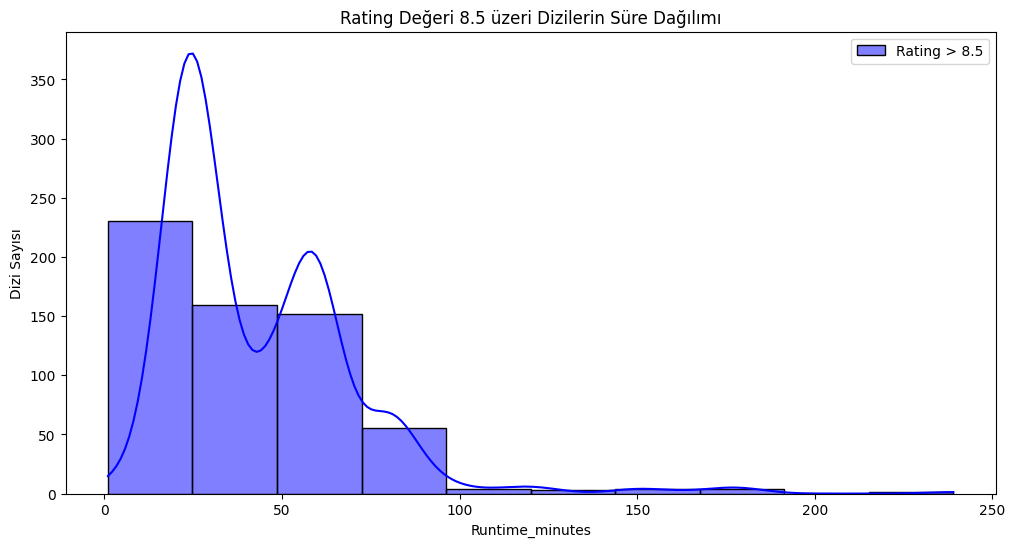

Rating değeri 8.5'un üzerinde olan dizilerin ortalama süresi: 43.159774280603436 dakika


In [88]:
#1. Rating değeri 8.5'un üzerinde olanlar için Runtime dağılımı nasıl değişiyor?
above = df[df['Rating'] > 8.5]
plt.figure(figsize=(12, 6))
sns.histplot(above['Runtime_minutes'], bins=10, kde=True, color='blue', label='Rating > 8.5')
plt.xlabel('Runtime_minutes')
plt.ylabel('Dizi Sayısı')
plt.title("Rating Değeri 8.5 üzeri Dizilerin Süre Dağılımı")
plt.legend()
plt.show()

average_runtime = above['Runtime_minutes'].mean()
print(f"Rating değeri 8.5'un üzerinde olan dizilerin ortalama süresi: {average_runtime} dakika")

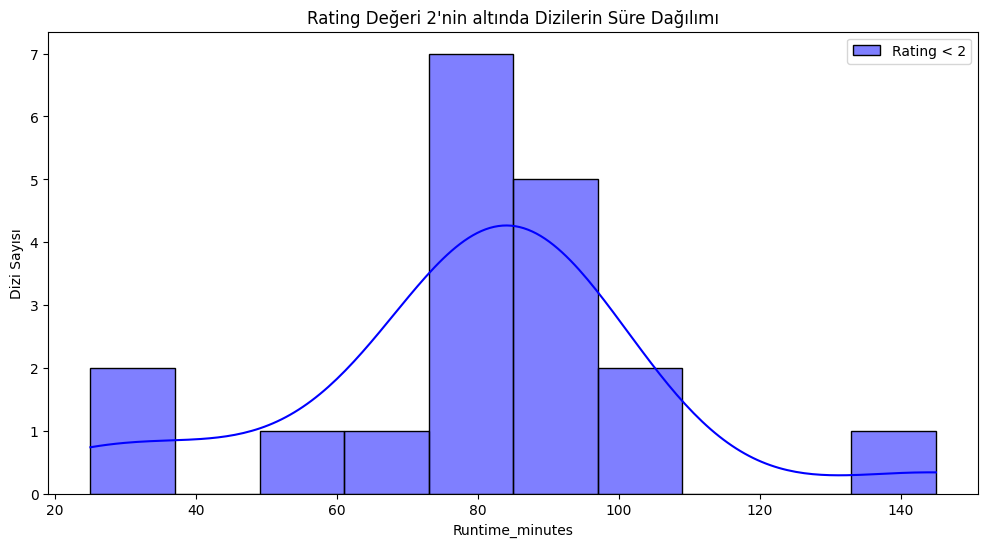

Rating değeri 2'nin altında olan dizilerin ortalama süresi: 79.5825184335421 dakika


In [89]:
#2.Rating değeri 2'nin altında olanlar için Runtime dağılımı nasıl değişiyor?
below = df[df['Rating'] < 2]
plt.figure(figsize=(12, 6))
sns.histplot(below['Runtime_minutes'], bins=10, kde=True, color='blue', label='Rating < 2')
plt.xlabel('Runtime_minutes')
plt.ylabel('Dizi Sayısı')
plt.title("Rating Değeri 2'nin altında Dizilerin Süre Dağılımı")
plt.legend()
plt.show()

average_runtime_below = below['Runtime_minutes'].mean()
print(f"Rating değeri 2'nin altında olan dizilerin ortalama süresi: {average_runtime_below} dakika")

In [90]:
#3.En yüksek rating oranına sahip dizinin oyuncu kadrosu nasıldır?
highest_rating = df['Rating'].max()
highest_rated_show = df[df['Rating'] == highest_rating]
cast_of_highest_rated_show = highest_rated_show['Stars'].iloc[0]
print(f"En yüksek rating oranına sahip dizi ({highest_rating} rating) oyuncu kadrosu:")
print(cast_of_highest_rated_show)


En yüksek rating oranına sahip dizi (9.7 rating) oyuncu kadrosu:
['Ranboo', '', 'Charlie Dalgleish', '', 'Keenan Mosimann', '', 'Brendan Thro']


In [91]:
#4.En düşük rating oranına sahip diziyi dizinin oyuncu kadrosu nasıldır?
lowest_rating = df['Rating'].min()
lowest_rated_show = df[df['Rating'] == lowest_rating]
cast_of_lowest_rated_show = lowest_rated_show['Stars'].iloc[0]
print(f"En düşük rating oranına sahip dizi ({lowest_rating} rating) oyuncu kadrosu:")
print(cast_of_lowest_rated_show)


En düşük rating oranına sahip dizi (1.1 rating) oyuncu kadrosu:
['Brendan Schaub']


In [92]:
#5.Number Of Votes sayısı 60k nın üzerinde ve altında olanlar için Rating dağılımı nasıl değişiyor? 
above_60k_votes = df[df['Number of Votes'] > 60000]
below_60k_votes = df[df['Number of Votes'] <= 60000]

# 60K'nın üzeri oy alan dizilerin rating istatistiklerini hesaplayın
above_60k_average_rating = above_60k_votes['Rating'].mean()
above_60k_min_rating = above_60k_votes['Rating'].min()
above_60k_max_rating = above_60k_votes['Rating'].max()

# 60K'nın altı oy alan dizilerin rating istatistiklerini hesaplayın
below_60k_average_rating = below_60k_votes['Rating'].mean()
below_60k_min_rating = below_60k_votes['Rating'].min()
below_60k_max_rating = below_60k_votes['Rating'].max()

print("60K'nın Üzerinde Oy Alan Dizilerin Rating İstatistikleri:")
print(f"Ortalama Rating: {above_60k_average_rating:.2f}")
print(f"Minimum Rating: {above_60k_min_rating:.2f}")
print(f"Maksimum Rating: {above_60k_max_rating:.2f}")

print("\n60K'nın Altında Oy Alan Dizilerin Rating İstatistikleri:")
print(f"Ortalama Rating: {below_60k_average_rating:.2f}")
print(f"Minimum Rating: {below_60k_min_rating:.2f}")
print(f"Maksimum Rating: {below_60k_max_rating:.2f}")


60K'nın Üzerinde Oy Alan Dizilerin Rating İstatistikleri:
Ortalama Rating: 7.46
Minimum Rating: 1.60
Maksimum Rating: 9.50

60K'nın Altında Oy Alan Dizilerin Rating İstatistikleri:
Ortalama Rating: 6.46
Minimum Rating: 1.10
Maksimum Rating: 9.70


In [93]:
#6.En yüksek ve en düşük rating değerine sahip olan dizileri kim yönetmiştir?
max_rating = df['Rating'].max()
highest_rated_show = df[df['Rating'] == max_rating]
directors_of_highest_rated_show = highest_rated_show['Directors'].values[0]
print(f"En yüksek rating oranına sahip dizi ({max_rating} rating) yönetmeni(leri):")
print(directors_of_highest_rated_show)

min_rating = df['Rating'].min()
lowest_rated_show = df[df['Rating'] == min_rating]
directors_of_lowest_rated_show = lowest_rated_show['Directors'].values[0]
print(f"En düşük rating oranına sahip dizi ({min_rating} rating) yönetmeni(leri):")
print(directors_of_lowest_rated_show)

En yüksek rating oranına sahip dizi (9.7 rating) yönetmeni(leri):
[]
En düşük rating oranına sahip dizi (1.1 rating) yönetmeni(leri):
['Casey Geraghty', '', 'Michael Nell', '|']


In [94]:
#7.En yüksek rating değerine sahip dizinin türü nedir?
max_rating = df['Rating'].max()
highest_rated_show = df[df['Rating'] == max_rating]
genre_of_highest_rated_show = highest_rated_show['Genre'].values[0]
print(f"En yüksek rating oranına sahip dizi ({max_rating} rating) türü: {genre_of_highest_rated_show}")

En yüksek rating oranına sahip dizi (9.7 rating) türü: Comedy, Horror


In [95]:
#8.En yüksek ortalamaya sahip 10 türü ve ortalama puanlarını yazdırın
unique_genres = df['Genre'].unique()
average_ratings_by_genre = {}

for genre in unique_genres:
    genre_df = df[df['Genre'] == genre]
    average_rating = genre_df['Rating'].mean()
    average_ratings_by_genre[genre] = average_rating
top_10_genres = sorted(average_ratings_by_genre.items(), key=lambda x: x[1], reverse=True)[:10]

for genre, average_rating in top_10_genres:
    print(f"{genre}: {average_rating:.2f}")

Comedy, News: 9.30
Documentary, Comedy, Reality-TV: 8.75
Comedy, Music, Sci-Fi: 8.60
Documentary, Animation, Biography: 8.60
Comedy, History, War: 8.40
Comedy, Family, Talk-Show: 8.40
Action, Family, Adventure: 8.40
Short, Comedy, Talk-Show: 8.40
Short, Comedy, Musical: 8.30
Documentary, Short, Comedy: 8.30


In [96]:
#9.Son 5 yılda çıkan dizilerin rating dağılımları nasıl?
current_year = 2023
years_to_consider = 5
start_year = current_year - years_to_consider
recent_dramas = df[df['Release Year'] >= start_year]

average_rating = recent_dramas['Rating'].mean()
min_rating = recent_dramas['Rating'].min()
max_rating = recent_dramas['Rating'].max()

print(f'Son {years_to_consider} Yılda Çıkan Dizilerin Rating İstatistikleri ({start_year}-{current_year})')
print(f'Ortalama Rating: {average_rating:.2f}')
print(f'Minimum Rating: {min_rating:.2f}')
print(f'Maksimum Rating: {max_rating:.2f}')

Son 5 Yılda Çıkan Dizilerin Rating İstatistikleri (2018-2023)
Ortalama Rating: 6.83
Minimum Rating: 1.10
Maksimum Rating: 9.70


In [97]:
#10. 100.000 oydan fazla oylanan dizilerin Certificate dağılımı nasıldır?
most_voted_dramas = df[df['Number of Votes'] > 100000]
certificate_distribution = most_voted_dramas['Certificate'].value_counts()
print("En Fazla Oylanan Dizilerin Certificate Dağılımı:")
print(certificate_distribution)

En Fazla Oylanan Dizilerin Certificate Dağılımı:
Certificate
PG-13        422
TV-MA        393
R            325
PG           260
TV-14        260
TV-PG        109
G             44
Passed         6
Not Rated      5
TV-Y7          2
Approved       2
TV-G           1
13+            1
Name: count, dtype: int64


**ADIM 5: Makine Öğrenmesi ve Test Edilmesi**

In [98]:
df = df.drop('Genre', axis=1)
df = df.drop('Cast', axis=1)
df = df.drop('Synopsis', axis=1)
df = df.drop('Runtime', axis=1)
df = df.drop('Certificate', axis=1)
df = df.drop('Gross Revenue', axis=1)
df = df.drop('Stars', axis=1)
df = df.drop('Directors', axis=1)

In [99]:
df.head()

,Title,IMDb ID,Release Year,Rating,Number of Votes,Runtime_minutes
0,Succession,tt7660850,2018.0,8.9,203682,60.0
1,Ted Lasso,tt10986410,2020.0,8.8,274806,30.0
2,Barry,tt5348176,2018.0,8.4,101883,30.0
3,Guardians of the Galaxy Vol. 3,tt6791350,2023.0,8.2,160447,150.0
4,Dungeons & Dragons: Honor Among Thieves,tt2906216,2023.0,7.3,123247,134.0


In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Verileri kullanarak Polinom Regresyon modelinin oluşturulması
X = df[["Release Year", "Number of Votes", "Runtime_minutes"]]
y = df["Rating"]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# 10 adet sentetik veri oluşturuldu.
synthetic_data = np.array([
    [2022.0, 500, 45],
    [2021.0, 600, 50],
    [2020.0, 700, 55],
    [2023.0, 800, 60],
    [2022.0, 900, 65],
    [2021.0, 1000, 70],
    [2020.0, 1100, 75],
    [2023.0, 1200, 80],
    [2021.0, 1300, 85],
    [2022.0, 1400, 90]
])

# Sentetik verileri Polinom Regresyon modeli ile tahmini
synthetic_data_poly = poly.transform(synthetic_data)
poly_synthetic_predictions = poly_reg.predict(synthetic_data_poly)

# Gerçek hedef değerleri
synthetic_actual_values = np.array([7.5, 8.0, 8.5, 8.2, 7.9, 8.1, 8.4, 8.6, 7.8, 7.2])

# Polinom Regresyon için MAE, MSE, RMSE ve R-Kare hesaplamaları
poly_mae = mean_absolute_error(synthetic_actual_values, poly_synthetic_predictions)
poly_mse = mean_squared_error(synthetic_actual_values, poly_synthetic_predictions)
poly_rmse = np.sqrt(poly_mse)

print("Polinom Regresyon MAE:", poly_mae)
print("Polinom Regresyon MSE:", poly_mse)
print("Polinom Regresyon RMSE:", poly_rmse)


Polinom Regresyon MAE: 1.3790854168627402
Polinom Regresyon MSE: 2.0942964304754765
Polinom Regresyon RMSE: 1.4471684181447149


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
